<a href="https://colab.research.google.com/github/raulbenitez/conceptosclaros_ML/blob/master/Introduccion_RNNs.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from google.colab import drive
drive.mount('/content/gdrive')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at /content/gdrive


Redes Neuronales Recurrentes (RNNs):

Son redes neuronales con una unidad de memoria que permite procesar datos de naturaleza secuencial:
- Señales temporales (audio, series temporales, etc.)
- Texto (secuencias encadanadas de caracteres)
- Vídeo

Las RNN tienen una unidad de memoria que permite ser entrenada sin problemas de estabilidad al aplicar el algoritmo de retro-poropagación. La unidad de memoria más usual es la Long Short-Term Memory (LSTM), que constan de tres puertas que controlan cuándo el dato entra (input gate), cuándo se sobreescribe (forget gate) y cuándo se transmite a la salida (output gate). 

La estructura es la siguiente:



![alt text](https://drive.google.com/uc?export=view&id=1naVymYKjg0mbjI0PTZ4JJmGd5orKHY4j)


# Ejemplo 1: Clasificación de críticas de películas en IMDB:

En este caso los datos consisten en fragmentos de texto en los que usuarios de IMDB escriben su opinión sobre una determinada película. El objectivo es clasificar el comentario como positivo o negativo. 

Los datos tienen las características siguientes:

- Los 80 primeras palabras de cada opinión. si la opinión tiene menos de 80 palabras, se aplica un relleno para que llegue a 80 y así todas las críticas tengan el mismo tamaño. 

- El número máximo de palabras distintas se limita a 20000. La codificación de las palabras no se hace con un vector de 20000 bits porque sería demasiado ineficiente. La primera capa de la red neuronal (capa de proyección) proyecta los datos a un espacio de dimensionalidad reducida (vocabulario reducido de 128 dimesniones).

En la red que se construye en el ejemplo siguiente hay tres capas: la de proyección, que reduce el vocabulario a un espacio de ciento veintiocho dimensiones; la LSTM, con factor de abandono incluido; y la capa de salida, en este caso con una sola unidad porque la respuesta en este caso es binaria.

La información detallada sobre la base de datos imdb se puede consultarse en https://keras.io/api/datasets/imdb/



In [2]:
from keras.preprocessing import sequence
from keras.models import Sequential
from keras.layers import Dense, Embedding
from keras.layers import LSTM
from keras.datasets import imdb

# Numero de palabras distintas usadas como maximo
max_features = 20000
# De cada opinion se toman las 80 primeras palabras
maxlen = 80  
# Y las opiniones se agrupan en lotes de 32
batch_size = 32

# Cargar los datos
print('Loading data...')
(x_train, y_train), (x_test, y_test) = imdb.load_data(num_words=max_features)
print(len(x_train), 'train sequences')
print(len(x_test), 'test sequences')

# Empaquetar los ejemplos en matrices cuadradas (rellenar)
print('Pad sequences (samples x time)')
x_train = sequence.pad_sequences(x_train, maxlen=maxlen)
x_test = sequence.pad_sequences(x_test, maxlen=maxlen)
print('x_train shape:', x_train.shape)
print('x_test shape:', x_test.shape)

# Crear el modelo con tres capas
print('Build model...')
model = Sequential()
model.add(Embedding(max_features, 128))
model.add(LSTM(128, dropout=0.2, recurrent_dropout=0.2))
model.add(Dense(1, activation='sigmoid'))

# Compilar y entrenar
model.compile(loss='binary_crossentropy',
              optimizer='adam',
              metrics=['accuracy'])

print('Train...')
model.fit(x_train, y_train,
          batch_size=batch_size,
          epochs=15,
          validation_data=(x_test, y_test))

# Evaluar con los datos de test
score, acc = model.evaluate(x_test, y_test,
                            batch_size=batch_size)
print('Test score:', score)
print('Test accuracy:', acc)


Using TensorFlow backend.


Loading data...
17465344/17464789 [==============================] - 2s 0us/step
25000 train sequences
25000 test sequences
Pad sequences (samples x time)
x_train shape: (25000, 80)
x_test shape: (25000, 80)
Build model...
Train...


/usr/local/lib/python3.6/dist-packages/tensorflow/python/framework/indexed_slices.py:434: UserWarning: Converting sparse IndexedSlices to a dense Tensor of unknown shape. This may consume a large amount of memory.
  "Converting sparse IndexedSlices to a dense Tensor of unknown shape. "


Train on 25000 samples, validate on 25000 samples
Epoch 1/15
25000/25000 [==============================] - 129s 5ms/step - loss: 0.4628 - accuracy: 0.7822 - val_loss: 0.3855 - val_accuracy: 0.8318
Epoch 2/15
25000/25000 [==============================] - 129s 5ms/step - loss: 0.3112 - accuracy: 0.8722 - val_loss: 0.3925 - val_accuracy: 0.8339
Epoch 3/15
25000/25000 [==============================] - 129s 5ms/step - loss: 0.2275 - accuracy: 0.9120 - val_loss: 0.4276 - val_accuracy: 0.8307
Epoch 4/15
25000/25000 [==============================] - 130s 5ms/step - loss: 0.1647 - accuracy: 0.9372 - val_loss: 0.4753 - val_accuracy: 0.8164
Epoch 5/15
25000/25000 [==============================] - 129s 5ms/step - loss: 0.1196 - accuracy: 0.9570 - val_loss: 0.5845 - val_accuracy: 0.8264
Epoch 6/15
25000/25000 [==============================] - 130s 5ms/step - loss: 0.0827 - accuracy: 0.9704 - val_loss: 0.6370 - val_accuracy: 0.8235
Epoch 7/15
25000/25000 [==============================] - 129s

# Ejemplo 2: Predicción del frame siguiente:

En este ejemplo se combinan las redes recurrentes y las redes convolucionales para resolver un problema de predicción del frame siguiente en secuencias de imágenes generadas artificialmente. Más detalles en:

from https://keras.io/examples/vision/conv_lstm/


# Next-frame prediction with Conv-LSTM

**Author:** [jeammimi](https://github.com/jeammimi)<br>
**Date created:** 2016/11/02<br>
**Last modified:** 2020/05/01<br>
**Description:** Predict the next frame in a sequence using a Conv-LSTM model.

## Introduction

This script demonstrates the use of a convolutional LSTM model.
The model is used to predict the next frame of an artificially
generated movie which contains moving squares.


## Setup


In [3]:
from tensorflow import keras
from tensorflow.keras import layers
import numpy as np
import pylab as plt

## Build a model

We create a model which take as input movies of shape
`(n_frames, width, height, channels)` and returns a movie
of identical shape.


In [4]:
seq = keras.Sequential(
    [
        keras.Input(
            shape=(None, 40, 40, 1)
        ),  # Variable-length sequence of 40x40x1 frames
        layers.ConvLSTM2D(
            filters=40, kernel_size=(3, 3), padding="same", return_sequences=True
        ),
        layers.BatchNormalization(),
        layers.ConvLSTM2D(
            filters=40, kernel_size=(3, 3), padding="same", return_sequences=True
        ),
        layers.BatchNormalization(),
        layers.ConvLSTM2D(
            filters=40, kernel_size=(3, 3), padding="same", return_sequences=True
        ),
        layers.BatchNormalization(),
        layers.ConvLSTM2D(
            filters=40, kernel_size=(3, 3), padding="same", return_sequences=True
        ),
        layers.BatchNormalization(),
        layers.Conv3D(
            filters=1, kernel_size=(3, 3, 3), activation="sigmoid", padding="same"
        ),
    ]
)
seq.compile(loss="binary_crossentropy", optimizer="adadelta")


## Generate artificial data

Generate movies with 3 to 7 moving squares inside.
The squares are of shape 1x1 or 2x2 pixels,
and move linearly over time.
For convenience, we first create movies with bigger width and height (80x80)
and at the end we select a 40x40 window.


In [5]:
def generate_movies(n_samples=1200, n_frames=15):
    row = 80
    col = 80
    noisy_movies = np.zeros((n_samples, n_frames, row, col, 1), dtype=np.float)
    shifted_movies = np.zeros((n_samples, n_frames, row, col, 1), dtype=np.float)

    for i in range(n_samples):
        # Add 3 to 7 moving squares
        n = np.random.randint(3, 8)

        for j in range(n):
            # Initial position
            xstart = np.random.randint(20, 60)
            ystart = np.random.randint(20, 60)
            # Direction of motion
            directionx = np.random.randint(0, 3) - 1
            directiony = np.random.randint(0, 3) - 1

            # Size of the square
            w = np.random.randint(2, 4)

            for t in range(n_frames):
                x_shift = xstart + directionx * t
                y_shift = ystart + directiony * t
                noisy_movies[
                    i, t, x_shift - w : x_shift + w, y_shift - w : y_shift + w, 0
                ] += 1

                # Make it more robust by adding noise.
                # The idea is that if during inference,
                # the value of the pixel is not exactly one,
                # we need to train the model to be robust and still
                # consider it as a pixel belonging to a square.
                if np.random.randint(0, 2):
                    noise_f = (-1) ** np.random.randint(0, 2)
                    noisy_movies[
                        i,
                        t,
                        x_shift - w - 1 : x_shift + w + 1,
                        y_shift - w - 1 : y_shift + w + 1,
                        0,
                    ] += (noise_f * 0.1)

                # Shift the ground truth by 1
                x_shift = xstart + directionx * (t + 1)
                y_shift = ystart + directiony * (t + 1)
                shifted_movies[
                    i, t, x_shift - w : x_shift + w, y_shift - w : y_shift + w, 0
                ] += 1

    # Cut to a 40x40 window
    noisy_movies = noisy_movies[::, ::, 20:60, 20:60, ::]
    shifted_movies = shifted_movies[::, ::, 20:60, 20:60, ::]
    noisy_movies[noisy_movies >= 1] = 1
    shifted_movies[shifted_movies >= 1] = 1
    return noisy_movies, shifted_movies



## Train the model


In [ ]:
epochs = 200

noisy_movies, shifted_movies = generate_movies(n_samples=1200)
seq.fit(
    noisy_movies[:1000],
    shifted_movies[:1000],
    batch_size=10,
    epochs=epochs,
    verbose=2,
    validation_split=0.1,
)


Epoch 1/200


## Test the model on one movie

Feed it with the first 7 positions and then
predict the new positions.


In [ ]:
movie_index = 1004
track = noisy_movies[movie_index][:7, ::, ::, ::]

for j in range(16):
    new_pos = seq.predict(track[np.newaxis, ::, ::, ::, ::])
    new = new_pos[::, -1, ::, ::, ::]
    track = np.concatenate((track, new), axis=0)


# And then compare the predictions
# to the ground truth
track2 = noisy_movies[movie_index][::, ::, ::, ::]
for i in range(15):
    fig = plt.figure(figsize=(10, 5))

    ax = fig.add_subplot(121)

    if i >= 7:
        ax.text(1, 3, "Predictions !", fontsize=20, color="w")
    else:
        ax.text(1, 3, "Initial trajectory", fontsize=20)

    toplot = track[i, ::, ::, 0]

    plt.imshow(toplot)
    ax = fig.add_subplot(122)
    plt.text(1, 3, "Ground truth", fontsize=20)

    toplot = track2[i, ::, ::, 0]
    if i >= 2:
        toplot = shifted_movies[movie_index][i - 1, ::, ::, 0]

    plt.imshow(toplot)
    plt.savefig("%i_animate.png" % (i + 1))


# Ejemplo 3: Predicción de series temporales univariadas con RNNs

En este ejemplo se utilizan las RNNs con unidades de memoria LSTM para hacer predicción a un paso con series temporales univariadas. 

https://machinelearningmastery.com/time-series-forecasting-long-short-term-memory-network-python/


Los datos constan de los datos mensuales de ventas de champú durante un período de 3 años y por tanto incluyen un total de 36 observaciones. Se puede acceder al fichero de datos en https://raw.githubusercontent.com/jbrownlee/Datasets/master/shampoo.csv


In [3]:
folder_data = '/content/gdrive/My Drive/data_course/shampoo.txt'

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:17: FutureWarning: The pandas.datetime class is deprecated and will be removed from pandas in a future version. Import from datetime instead.


Month=1, Predicted=388.778925, Expected=339.700000
Month=2, Predicted=410.279774, Expected=440.400000
Month=3, Predicted=451.441214, Expected=315.900000
Month=4, Predicted=379.022264, Expected=439.300000
Month=5, Predicted=449.760822, Expected=401.300000
Month=6, Predicted=481.367683, Expected=437.400000
Month=7, Predicted=427.988861, Expected=575.500000
Month=8, Predicted=697.883343, Expected=407.600000
Month=9, Predicted=492.988652, Expected=682.000000
Month=10, Predicted=720.946365, Expected=475.300000
Month=11, Predicted=503.769422, Expected=581.300000
Month=12, Predicted=879.713950, Expected=646.900000
Test RMSE: 155.967


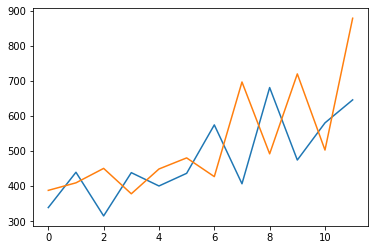

In [4]:
from pandas import DataFrame
from pandas import Series
from pandas import concat
from pandas import read_csv
from pandas import datetime
from sklearn.metrics import mean_squared_error
from sklearn.preprocessing import MinMaxScaler
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import LSTM
from math import sqrt
from matplotlib import pyplot
import numpy
 
# date-time parsing function for loading the dataset
def parser(x):
	return datetime.strptime('190'+x, '%Y-%m')
 
# frame a sequence as a supervised learning problem
def timeseries_to_supervised(data, lag=1):
	df = DataFrame(data)
	columns = [df.shift(i) for i in range(1, lag+1)]
	columns.append(df)
	df = concat(columns, axis=1)
	df.fillna(0, inplace=True)
	return df
 
# create a differenced series
def difference(dataset, interval=1):
	diff = list()
	for i in range(interval, len(dataset)):
		value = dataset[i] - dataset[i - interval]
		diff.append(value)
	return Series(diff)
 
# invert differenced value
def inverse_difference(history, yhat, interval=1):
	return yhat + history[-interval]
 
# scale train and test data to [-1, 1]
def scale(train, test):
	# fit scaler
	scaler = MinMaxScaler(feature_range=(-1, 1))
	scaler = scaler.fit(train)
	# transform train
	train = train.reshape(train.shape[0], train.shape[1])
	train_scaled = scaler.transform(train)
	# transform test
	test = test.reshape(test.shape[0], test.shape[1])
	test_scaled = scaler.transform(test)
	return scaler, train_scaled, test_scaled
 
# inverse scaling for a forecasted value
def invert_scale(scaler, X, value):
	new_row = [x for x in X] + [value]
	array = numpy.array(new_row)
	array = array.reshape(1, len(array))
	inverted = scaler.inverse_transform(array)
	return inverted[0, -1]
 
# fit an LSTM network to training data
def fit_lstm(train, batch_size, nb_epoch, neurons):
	X, y = train[:, 0:-1], train[:, -1]
	X = X.reshape(X.shape[0], 1, X.shape[1])
	model = Sequential()
	model.add(LSTM(neurons, batch_input_shape=(batch_size, X.shape[1], X.shape[2]), stateful=True))
	model.add(Dense(1))
	model.compile(loss='mean_squared_error', optimizer='adam')
	for i in range(nb_epoch):
		model.fit(X, y, epochs=1, batch_size=batch_size, verbose=0, shuffle=False)
		model.reset_states()
	return model
 
# make a one-step forecast
def forecast_lstm(model, batch_size, X):
	X = X.reshape(1, 1, len(X))
	yhat = model.predict(X, batch_size=batch_size)
	return yhat[0,0]
 
# load dataset
series = read_csv(folder_data, header=0, parse_dates=[0], index_col=0, squeeze=True, date_parser=parser)
 
# transform data to be stationary
raw_values = series.values
diff_values = difference(raw_values, 1)
 
# transform data to be supervised learning
supervised = timeseries_to_supervised(diff_values, 1)
supervised_values = supervised.values
 
# split data into train and test-sets
train, test = supervised_values[0:-12], supervised_values[-12:]
 
# transform the scale of the data
scaler, train_scaled, test_scaled = scale(train, test)
 
# fit the model
lstm_model = fit_lstm(train_scaled, 1, 3000, 4)
# forecast the entire training dataset to build up state for forecasting
train_reshaped = train_scaled[:, 0].reshape(len(train_scaled), 1, 1)
lstm_model.predict(train_reshaped, batch_size=1)
 
# walk-forward validation on the test data
predictions = list()
for i in range(len(test_scaled)):
	# make one-step forecast
	X, y = test_scaled[i, 0:-1], test_scaled[i, -1]
	yhat = forecast_lstm(lstm_model, 1, X)
	# invert scaling
	yhat = invert_scale(scaler, X, yhat)
	# invert differencing
	yhat = inverse_difference(raw_values, yhat, len(test_scaled)+1-i)
	# store forecast
	predictions.append(yhat)
	expected = raw_values[len(train) + i + 1]
	print('Month=%d, Predicted=%f, Expected=%f' % (i+1, yhat, expected))
 
# report performance
rmse = sqrt(mean_squared_error(raw_values[-12:], predictions))
print('Test RMSE: %.3f' % rmse)
# line plot of observed vs predicted
pyplot.plot(raw_values[-12:])
pyplot.plot(predictions)
pyplot.show()